In [1]:
# IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import joblib as jl

In [2]:
# IMPORT DATAFRAME

df_amc = pd.read_csv(r"D:\WORKOUTS\DATA_CLEANING\Dataset CSV\single_genre_artists.csv")
df_amc.head(5)

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [3]:
# COLUMNS

df_amc.columns

Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')

In [4]:
# CHECK NULL VALUES

df_amc.isna().sum()

id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64

In [5]:
# CHECK DUPLICATES

df_amc.duplicated().sum()

np.int64(0)

In [6]:
# FIX DATATYPE ISSUES

df_amc['duration_ms'] = pd.to_numeric(df_amc['duration_ms'], errors='coerce')
df_amc['duration_ms'] = (df_amc['duration_ms'] / (1000 * 60)).round(2)

df_amc['release_date'] = pd.to_datetime(df_amc['release_date'], format='mixed')

In [7]:
# INFO

df_amc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id_songs            95837 non-null  object        
 1   name_song           95837 non-null  object        
 2   popularity_songs    95837 non-null  int64         
 3   duration_ms         95837 non-null  float64       
 4   explicit            95837 non-null  int64         
 5   id_artists          95837 non-null  object        
 6   release_date        95837 non-null  datetime64[ns]
 7   danceability        95837 non-null  float64       
 8   energy              95837 non-null  float64       
 9   key                 95837 non-null  int64         
 10  loudness            95837 non-null  float64       
 11  mode                95837 non-null  int64         
 12  speechiness         95837 non-null  float64       
 13  acousticness        95837 non-null  float64   

In [8]:
# NORMALISATION USING STANDARD SCALER

df_clean = df_amc.drop(columns=['name_artists', 'id_artists', 'id_songs', 'name_song', 
                                'popularity_songs', 'explicit', 'release_date', 'mode', 
                                'key', 'time_signature', 'followers', 'genres', 'popularity_artists'], errors='ignore')

numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

print(df_clean.head())

   duration_ms  danceability  energy  loudness  speechiness  acousticness  \
0         2.69         0.563   0.184   -13.757       0.0512         0.993   
1         3.72         0.427   0.180   -15.375       0.0670         0.989   
2         3.47         0.511   0.206   -15.514       0.0592         0.995   
3         2.70         0.676   0.467   -12.393       0.1650         0.991   
4         2.80         0.650   0.298   -13.806       0.1380         0.991   

   instrumentalness  liveness  valence    tempo  
0          0.000016     0.325    0.654  133.088  
1          0.000000     0.128    0.431   78.459  
2          0.000000     0.418    0.481   70.443  
3          0.000000     0.219    0.726  129.775  
4          0.000000     0.373    0.844   75.950  


In [9]:
# DIMENSIONALITY REDUCTION USING PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Shape after PCA:", X_pca.shape)
print("Variance Explained:", pca.explained_variance_ratio_)

Shape after PCA: (95837, 2)
Variance Explained: [0.27079549 0.1882147 ]


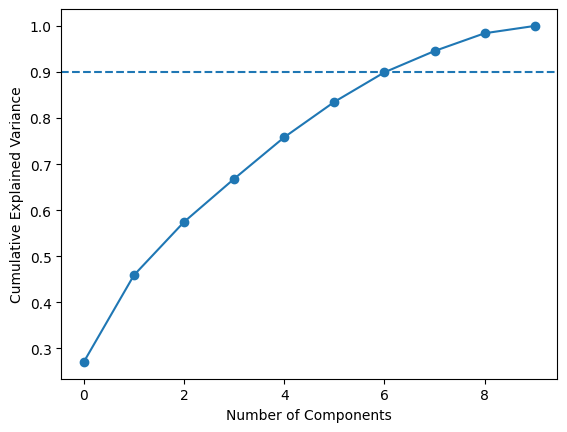

In [10]:
# VISUAL JUSTIFICATION

pca_full = PCA()
pca_full.fit(X_scaled)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.axhline(y=0.9, linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

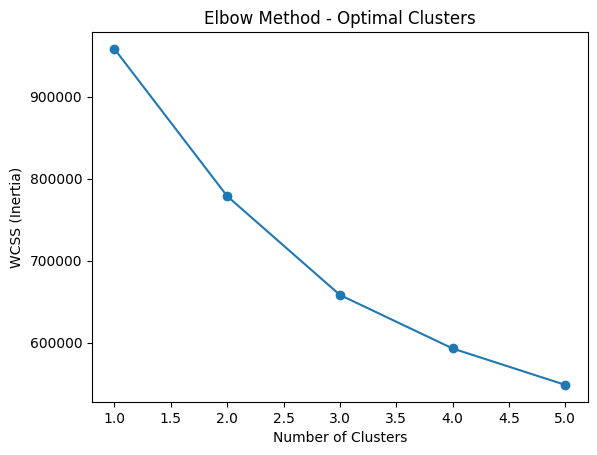

In [11]:
# CLUSTERING - ELBOW METHOD

wcss = []

for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

clusters = kmeans.fit_predict(X_scaled)

df_amc['cluster'] = clusters

plt.figure()
plt.plot(range(1, 6), wcss, marker='o')
plt.title("Elbow Method - Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.show()

In [12]:
# SAVE CLUSTERED DATASET FOR STREAMLIT

df_amc.to_csv(
    "single_genre_artists_clustered.csv",
    index=False
)

print("✅ Clustered dataset saved successfully")


✅ Clustered dataset saved successfully


In [13]:
# VERIFICATION THE DATA

df_amc[['name_song', 'cluster']].head()

,name_song,cluster
0,La Java,3
1,En Douce,3
2,J'en Ai Marre,3
3,Ils n'ont pas ca,3
4,La belote,3


In [14]:
# SILHOUETTE SCORE

scores = {}
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    scores[k] = silhouette_score(X_scaled, labels)

print("Silhouette Score:", scores)


Silhouette Score: {2: 0.2031782412803395, 3: 0.24240157523065226, 4: 0.23106645255285027, 5: 0.1859826295647418}


In [15]:
# DBSCAN WITH TUNING

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

outliers = X_scaled[labels == -1]

num_outliers = sum(labels == -1)

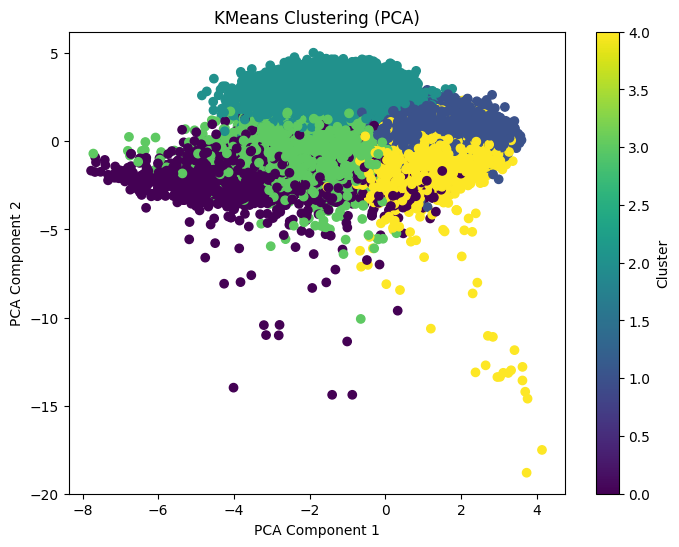

In [16]:
# VISUALIZATION

# 2D Scatter Plot (PCA + K-Means)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df_amc['cluster'],
    cmap='viridis'
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clustering (PCA)")
plt.colorbar(label="Cluster")
plt.show()


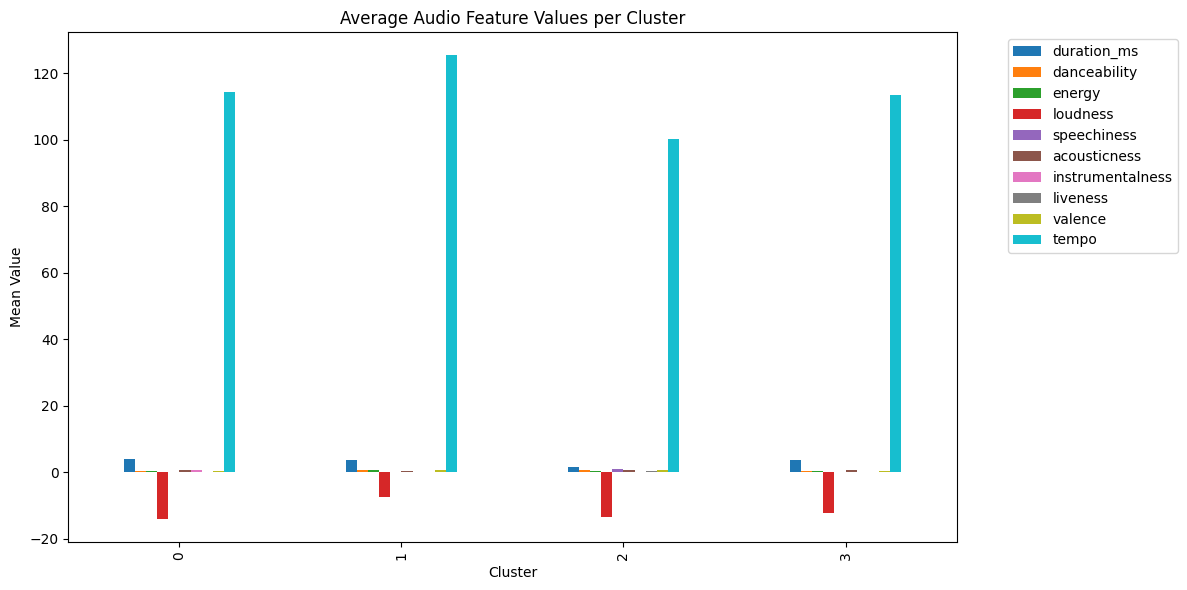

In [17]:
# BAR CHART - AVERAGE FEATURE VALUES PER CLUSTER

kmeans = KMeans(n_clusters=4, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

features = [
    'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

cluster_means = df_clean.groupby('cluster')[features].mean()

cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title("Average Audio Feature Values per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


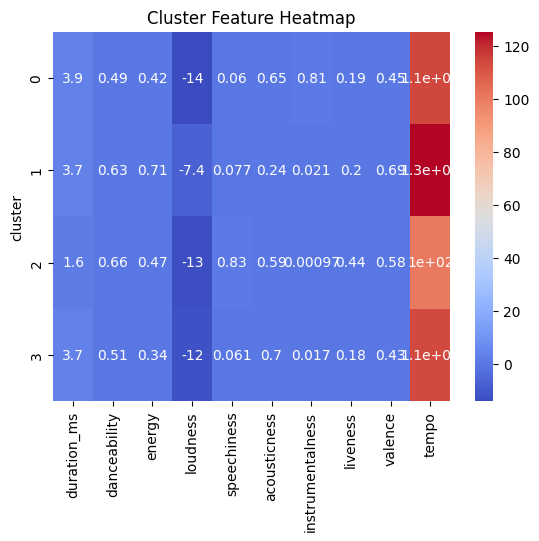

In [18]:
# HEATMAP - FEATURE COMPARISON ACROSS CLUSTERS

sns.heatmap(cluster_means, annot=True, cmap='coolwarm')
plt.title("Cluster Feature Heatmap")
plt.show()

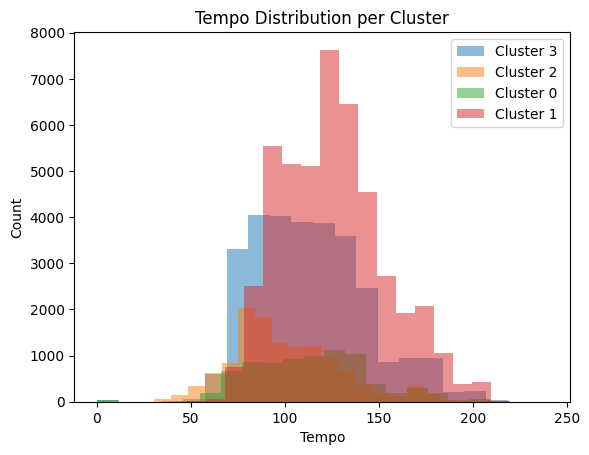

In [19]:
# DISTRIBUTION PLOTS (WITHIN EACH CLUSTER)

for c in df_clean['cluster'].unique():
    subset = df_clean[df_clean['cluster'] == c]
    plt.hist(
        subset['tempo'],
        bins=20,
        alpha=0.5,
        label=f'Cluster {c}'
    )

plt.xlabel("Tempo")
plt.ylabel("Count")
plt.title("Tempo Distribution per Cluster")
plt.legend()
plt.show()


In [20]:
# FINAL REPORT

# ADD CLUSTER TO THE ORIGINAL DATAFRAME

# Final clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
df_amc['cluster'] = kmeans.fit_predict(X_scaled)

df_amc[['name_song', 'cluster']].head()


,name_song,cluster
0,La Java,3
1,En Douce,3
2,J'en Ai Marre,3
3,Ils n'ont pas ca,3
4,La belote,3


In [21]:
# PROFILE CLUSTERS USING MEAN FEATURES

audio_features = [
    'danceability', 'energy', 'acousticness',
    'speechiness', 'instrumentalness',
    'valence', 'tempo'
]

cluster_summary = (
    df_amc
    .groupby('cluster')[audio_features]
    .mean()
    .round(3)
)

cluster_summary


,danceability,energy,acousticness,speechiness,instrumentalness,valence,tempo
cluster,,,,,,,
0,0.485,0.416,0.647,0.060,0.811,0.450,114.301
1,0.635,0.708,0.242,0.077,0.021,0.686,125.293
2,0.664,0.466,0.586,0.835,0.001,0.584,100.336
3,0.505,0.342,0.699,0.061,0.017,0.427,113.406


In [22]:
# READABLE CLUSTER LABELS

def label_cluster(row):
    if row['danceability'] > 0.65 and row['energy'] > 0.65:
        return "Party / Dance Tracks"
    elif row['energy'] < 0.4 and row['acousticness'] > 0.6:
        return "Chill Acoustic"
    elif row['energy'] > 0.7 and row['valence'] > 0.6:
        return "Workout / Feel-Good"
    else:
        return "Calm / Mixed Mood"

cluster_summary['cluster_profile'] = cluster_summary.apply(
    label_cluster, axis=1
)

cluster_summary


,danceability,energy,acousticness,speechiness,instrumentalness,valence,tempo,cluster_profile
cluster,,,,,,,,
0,0.485,0.416,0.647,0.060,0.811,0.450,114.301,Calm / Mixed Mood
1,0.635,0.708,0.242,0.077,0.021,0.686,125.293,Workout / Feel-Good
2,0.664,0.466,0.586,0.835,0.001,0.584,100.336,Calm / Mixed Mood
3,0.505,0.342,0.699,0.061,0.017,0.427,113.406,Chill Acoustic


In [23]:
# MAP CLUSTER DESCRIPTION BASED ON SONGS

profile_map = cluster_summary['cluster_profile'].to_dict()

df_amc['cluster_profile'] = df_amc['cluster'].map(profile_map)

df_amc[['name_song', 'cluster', 'cluster_profile']].head()


,name_song,cluster,cluster_profile
0,La Java,3,Chill Acoustic
1,En Douce,3,Chill Acoustic
2,J'en Ai Marre,3,Chill Acoustic
3,Ils n'ont pas ca,3,Chill Acoustic
4,La belote,3,Chill Acoustic


In [24]:
# SHOW TOP TRACKS PER CLUSTER

top_tracks = (
    df_amc
    .sort_values(['cluster', 'popularity_songs'], ascending=[True, False])
    .groupby('cluster')
    .head(10)
)

top_tracks[['cluster', 'cluster_profile', 'name_song', 'popularity_songs']]


,cluster,cluster_profile,name_song,popularity_songs
35463,0,Calm / Mixed Mood,ROLLIN N CONTROLLIN FREESTYLE,83
35303,0,Calm / Mixed Mood,YKWIM?,79
34908,0,Calm / Mixed Mood,Buttercup,78
35333,0,Calm / Mixed Mood,Jealous,78
35332,0,Calm / Mixed Mood,Jealous,77
35079,0,Calm / Mixed Mood,Soft Brown Noise,76
34934,0,Calm / Mixed Mood,Friendships,75
35086,0,Calm / Mixed Mood,Show Me How,75
34935,0,Calm / Mixed Mood,Brahms Lullaby,74
35381,0,Calm / Mixed Mood,Snowman,74


In [25]:
# EXPORT FINAL DATASET

df_amc.to_csv(
    "AMC_Music_Clustered_Final.csv",
    index=False
)

cluster_summary.to_csv(
    "AMC_Cluster_Profiles.csv"
)

print("✅ Final datasets exported successfully")


✅ Final datasets exported successfully
